In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [22]:
### Create a Random Dataset with Sklearn

from sklearn.datasets import make_classification

X,y =make_classification(n_samples = 1000, n_features = 10,n_informative = 3,  n_classes = 2, random_state = 42)

In [23]:
X = pd.DataFrame(X)
X.head()


,0,1,2,3,4,5,6,7,8,9
0,-1.408059,0.898360,1.577889,-1.499181,-0.323898,0.248532,-1.544936,-1.981964,1.124777,0.148810
1,1.136616,0.264290,-0.854044,0.855202,0.780613,0.788868,-1.525572,-1.154163,1.313782,0.326078
2,-0.990615,-0.265605,0.848414,-0.170258,0.594419,0.685745,-0.650660,-2.090303,-0.399878,0.573126
3,-1.194565,-0.181503,4.061466,-0.995148,-1.759389,1.854545,0.321679,0.168060,-2.177065,-0.140595
4,2.917665,-0.630458,-3.711618,-0.380456,2.152247,0.438626,2.159121,0.091315,1.637082,0.542914


In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size = 0.3, random_state = 42)

In [25]:
X_train.shape

(700, 10)

In [26]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [27]:
y_pred = logistic_model.predict(X_test)

In [28]:
logistic_model.score(X_test,y_test)

0.89

In [29]:
logistic_model.predict_proba(X_test)

array([[9.99407808e-03, 9.90005922e-01],
       [8.40652432e-01, 1.59347568e-01],
       [9.48314449e-04, 9.99051686e-01],
       [3.35102010e-02, 9.66489799e-01],
       [8.99785710e-02, 9.10021429e-01],
       [8.34568508e-01, 1.65431492e-01],
       [2.41264401e-05, 9.99975874e-01],
       [2.31945697e-02, 9.76805430e-01],
       [9.93442488e-01, 6.55751181e-03],
       [7.82289425e-05, 9.99921771e-01],
       [9.42811270e-01, 5.71887297e-02],
       [9.82696764e-01, 1.73032360e-02],
       [4.92339517e-04, 9.99507660e-01],
       [5.59990503e-04, 9.99440009e-01],
       [9.86530610e-01, 1.34693898e-02],
       [9.48379306e-01, 5.16206938e-02],
       [8.82373304e-01, 1.17626696e-01],
       [1.18323982e-01, 8.81676018e-01],
       [7.03184023e-03, 9.92968160e-01],
       [9.72185917e-01, 2.78140826e-02],
       [8.47859303e-02, 9.15214070e-01],
       [9.99774592e-01, 2.25408071e-04],
       [1.85576128e-01, 8.14423872e-01],
       [9.39110893e-01, 6.08891068e-02],
       [7.643008

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_pred, y_test)
classification_report = classification_report(y_pred, y_test)

In [31]:
print(accuracy)
print(classification_report)

0.89
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       157
           1       0.84      0.94      0.89       143

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.90      0.89      0.89       300



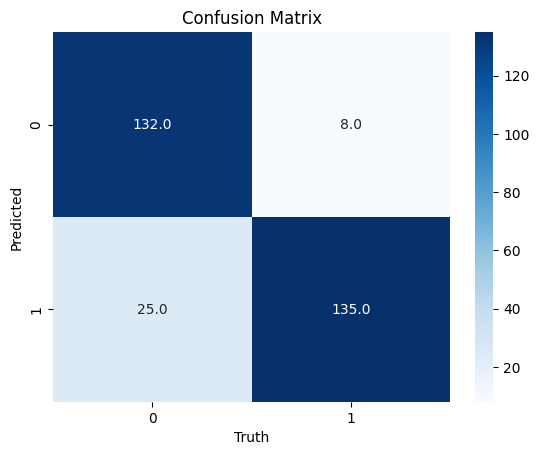

In [32]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt = ".1f")
plt.title('Confusion Matrix')
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.show()

### **Hyperparameter Tuning Using Grid Search**

In [51]:
tuned_model = LogisticRegression()

Penalty=['l1', 'l2', 'elasticnet']
c=[1.0,2.0,3.0,1.5,2.5]
Solver=['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

In [52]:
params = dict(penalty = Penalty, C =c, solver =Solver,)

***K-Fold:***

Simple Split: K-Fold randomly splits the data into k equal folds (sub-datasets).

No Class Balancing: It doesn't consider the class distribution of your data.

Each fold is a random selection from the entire dataset.



---


***Stratified K-Fold:***

Preserves Class Ratio: Stratified K-Fold ensures each fold maintains the same proportion of classes as the entire dataset.

Balanced Folds: It stratifies (divides) the data by class label first, then splits each class into k folds.

In [53]:
### Grid Search CV and Statified K Fold

from sklearn.model_selection import GridSearchCV, StratifiedKFold
fold = StratifiedKFold()
gridsearch = GridSearchCV(estimator = tuned_model, param_grid= params, cv = fold, scoring = 'accuracy')


In [54]:
gridsearch

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [1.0, 2.0, 3.0, 1.5, 2.5],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [55]:
gridsearch.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [1.0, 2.0, 3.0, 1.5, 2.5],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [56]:
gridsearch.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}

In [57]:
gridsearch.best_score_

0.9214285714285714

In [62]:
y_pred = gridsearch.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score,classification_report

accuracy = accuracy_score(y_pred, y_test)
classification = classification_report(y_test,y_pred)

In [70]:
print(accuracy)
print(classification)

0.89
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       140
           1       0.94      0.84      0.89       160

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.90      0.89      0.89       300

[[132   8]
 [ 25 135]]
